#### Import Files

In [1]:
import numpy as np
import os
import sys
import random
import time
import pandas as pd
from sklearn.svm import SVR
import pickle
import math
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
plt.grid(True)

%matplotlib inline

#### Reading the dataset

In [2]:
# Dataset from values of April, 2017 to January, 2018 for BitCoins
data = pd.read_csv("SENSEX.csv")

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [4]:
# Separating the data columns
data_inputs = []
for i in range(len(data)):
    data_inputs.append([np.float32(data['Open'][i]), np.float32(data['High'][i]), np.float32(data['Low'][i])])


In [5]:
data_prices = np.float32(data['Close'])

#### Training and Testing Set Splits

In [6]:
data_inputs_train = data_inputs[:1900]
data_prices_train = data_prices[:1900]

data_inputs_test = data_inputs[1900:]
data_prices_test = data_prices[1900:]

In [7]:
len(data_inputs_train)
len(data_prices_train)

1900

### 1> Applying Neural Network Regression

In [8]:
# Creating and fitting the regression
mlp_ann = MLPRegressor(max_iter=10000)
ann = mlp_ann.fit(data_inputs_train, data_prices_train)

In [9]:
# Prediction on test data
predict_ann = ann.predict(data_inputs_test)

In [10]:
total_predict_ann = ann.predict(data_inputs)

In [11]:
# Root Mean Square Error
mse2 = mean_squared_error(predict_ann, data_prices_test)
mse2 = mse2/(pow(10,10))
mse2_scaled = sqrt(mse2)
print("Mean Squared Error Regression")
print(mse2_scaled)

Mean Squared Error Regression
0.0014154724523459045


Regression Analysis


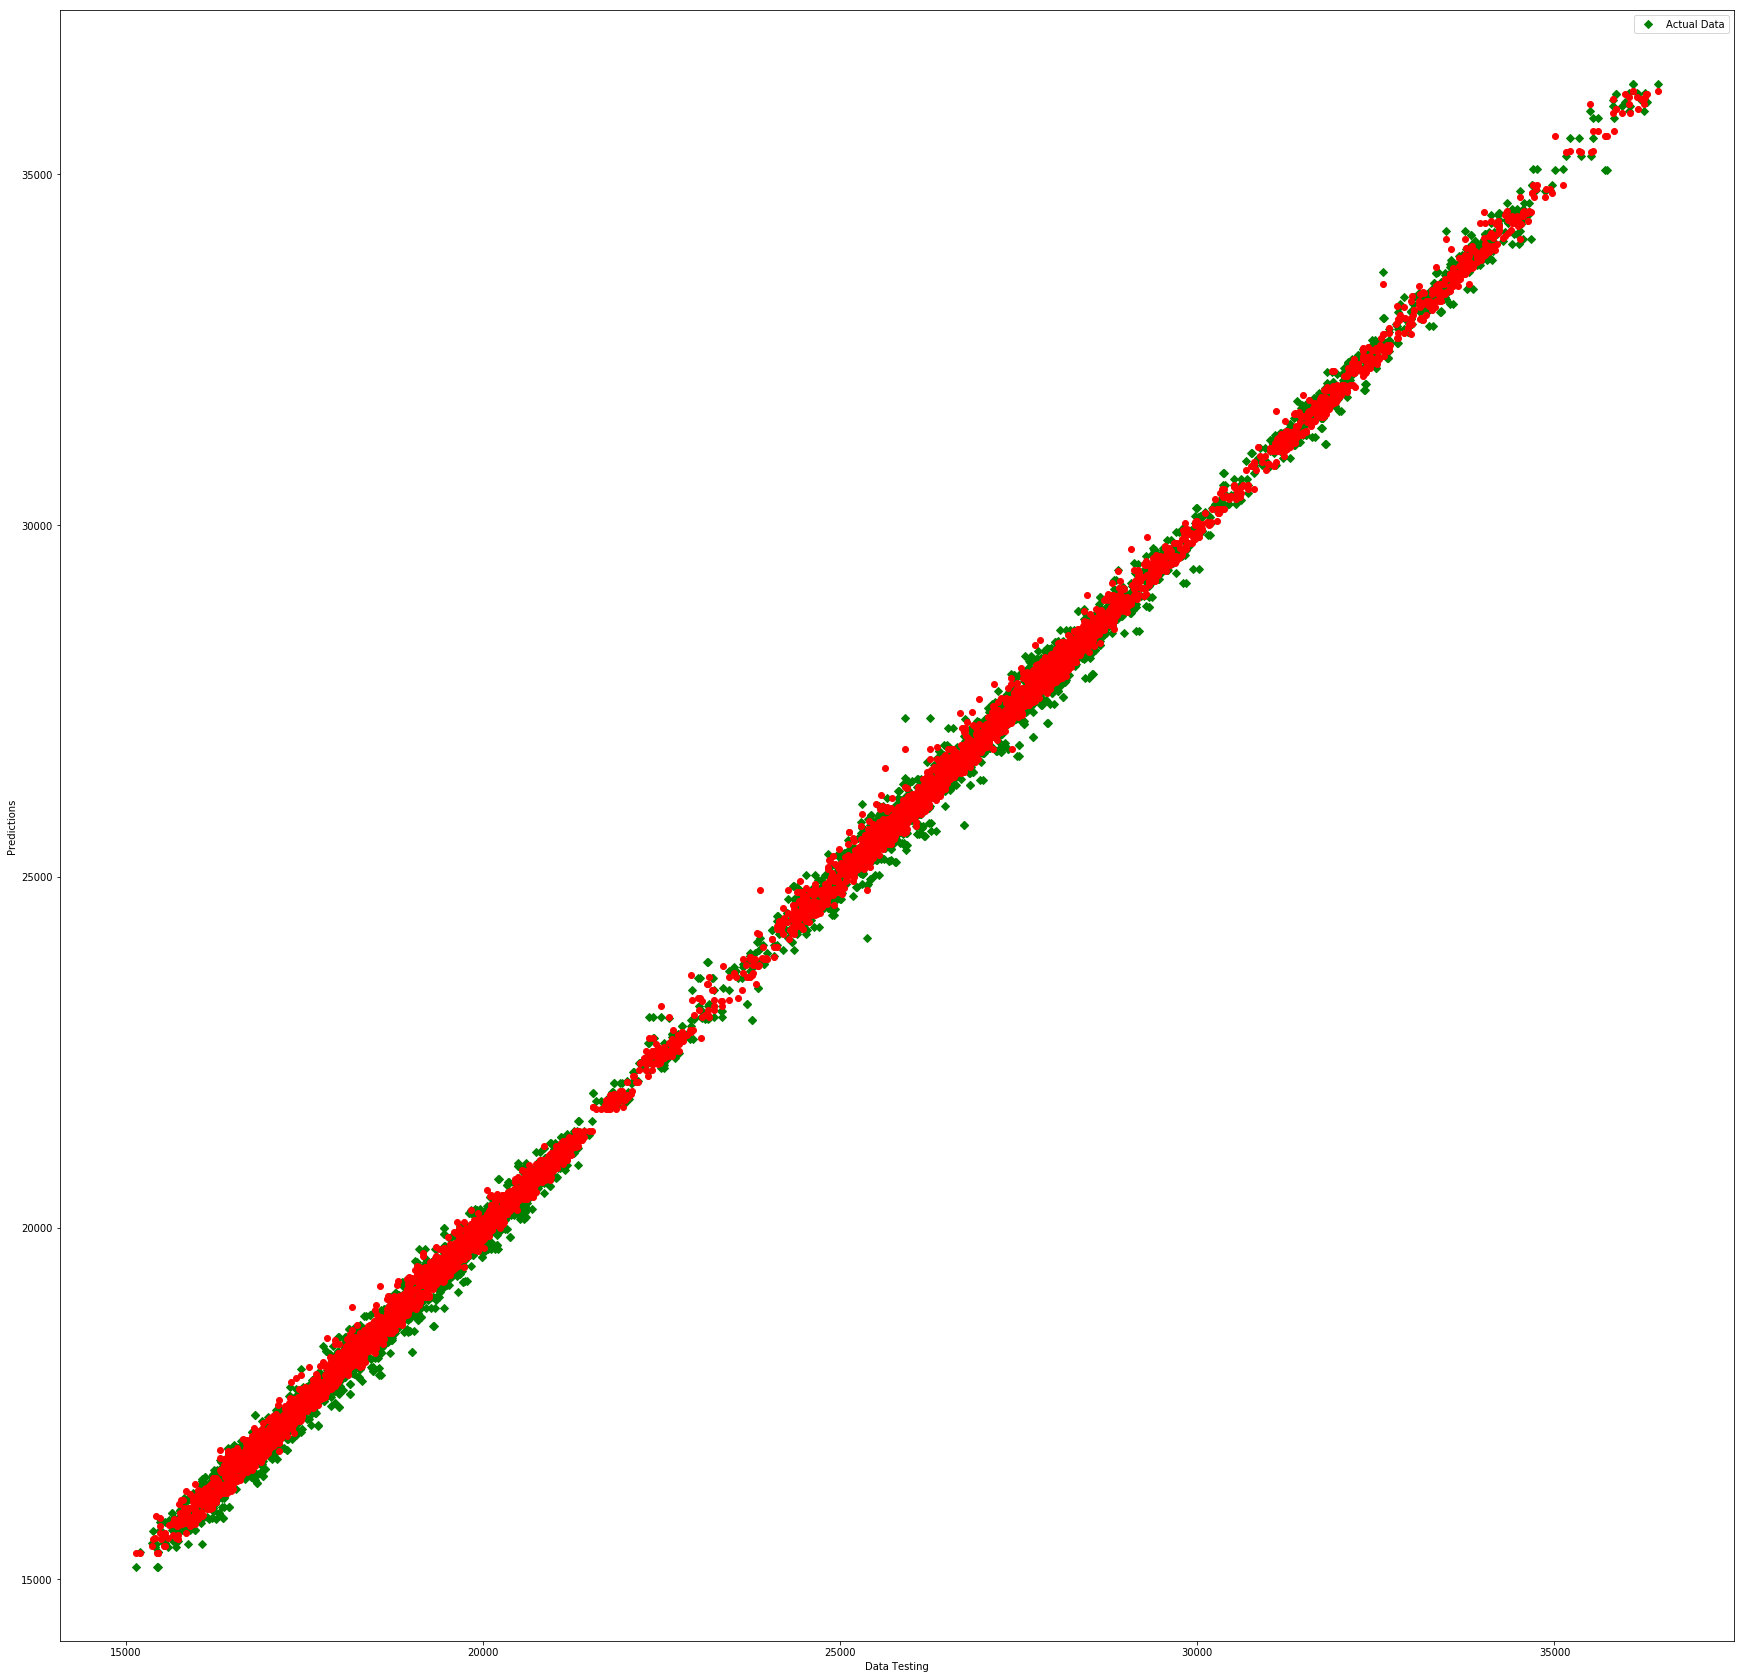

In [12]:
plt.figure(figsize=(30,30))
plt.plot(data_inputs, data_prices, 'gD', data_inputs, total_predict_ann, 'ro')
plt.legend(['Actual Data'])
plt.xlabel('Data Testing')
plt.ylabel('Predictions')
print('Regression Analysis')

### 2> Applying SVR

In [13]:
# Defining 2 degree SVM Regression
clf_2 = SVR(C=0.2, epsilon=0.2, kernel='poly', degree=1)

# Fitting SVR
clf_2.fit(data_inputs_train, data_prices_train)


SVR(C=0.2, cache_size=200, coef0=0.0, degree=1, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
check2 = pickle.dumps(clf_2)

In [15]:
# Predicting the list
clf_2_results = clf_2.predict(data_inputs_test).tolist()

In [16]:
# Predicting the list
new_clf_2_results = clf_2.predict(data_inputs).tolist()

In [17]:
mse = mean_squared_error(clf_2_results, data_prices_test)
mse = mse/(pow(10,10))
mse_scaled = sqrt(mse)
print("Mean Squared Error SVR")
print(mse_scaled)

Mean Squared Error SVR
0.0008975812253976563


SVR Analysis


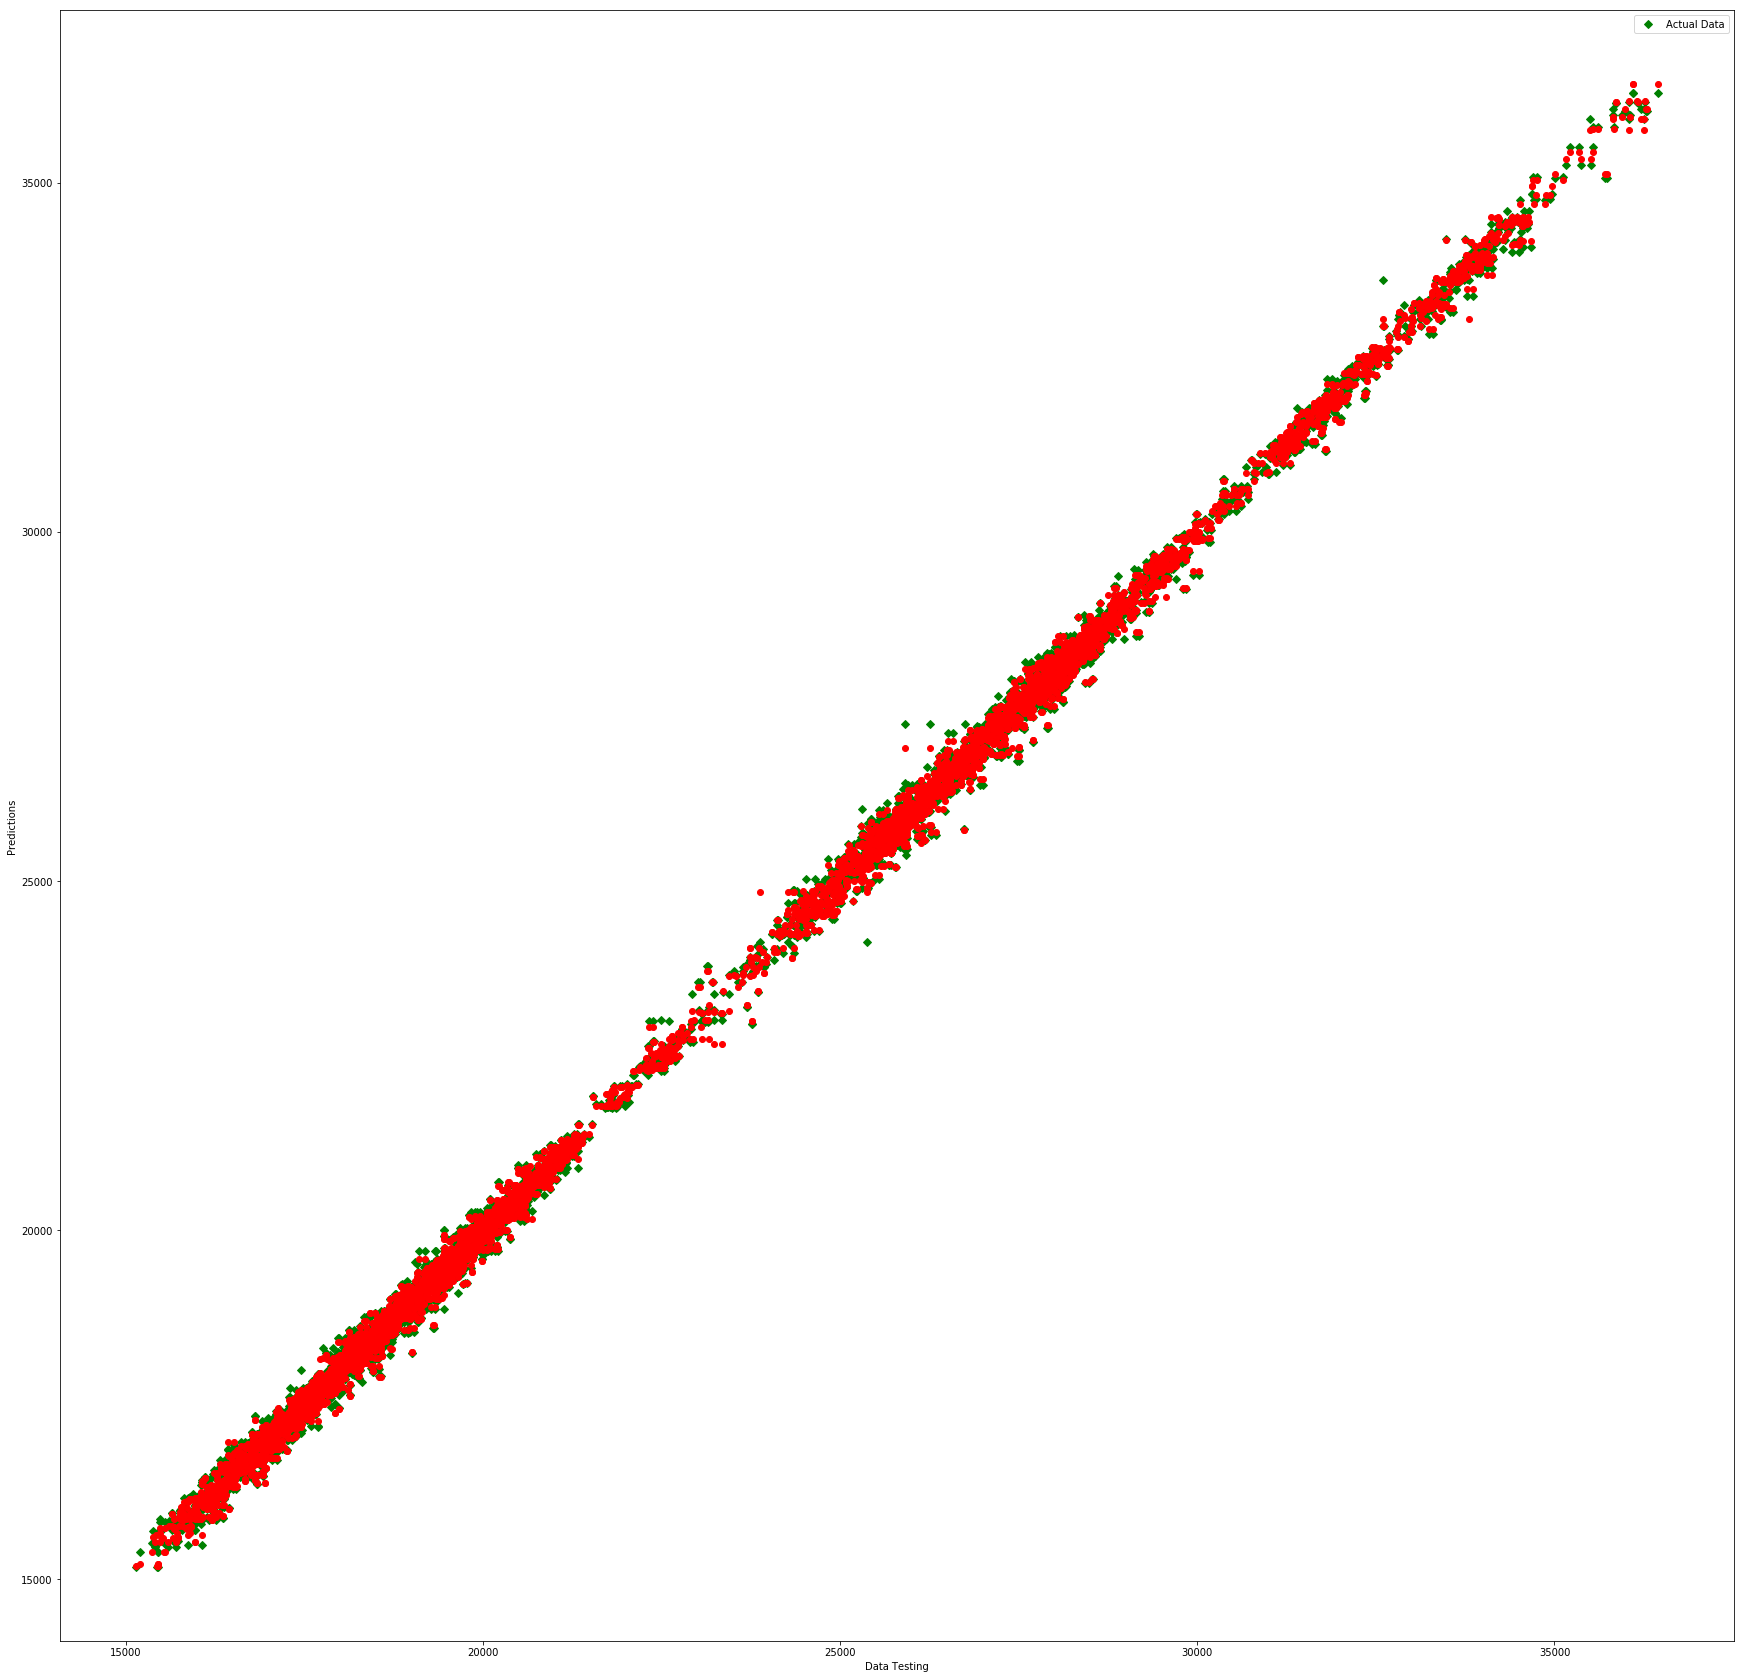

In [18]:
plt.figure(figsize=(30,30))
plt.plot(data_inputs, data_prices, 'gD', data_inputs, new_clf_2_results, 'ro')
plt.legend(['Actual Data'])
plt.xlabel('Data Testing')
plt.ylabel('Predictions')
print('SVR Analysis')